In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# 1. loading the dataset

In [2]:
#Load Dataset
dataset = pd.read_csv("OnlineRetail.csv",encoding = 'unicode_escape')
print (dataset.columns)
dataset.head(10)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [3]:
dataset.info() 
dataset.describe() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
dataset.shape # Shape

(541909, 8)

In [5]:
#finding out unique variables
print("InvoiceNo : ",dataset.InvoiceNo.unique())
print("Quantity : ",dataset.Quantity.unique())
print("Country : ",dataset['Country'].unique())

InvoiceNo :  ['536365' '536366' '536367' ... '581585' '581586' '581587']
Quantity :  [     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     56     72    200
    600    480     -6     14     -2     11     33     13     -4     -5
     -7     -3     70    252     60    216    384    -10     27     15
     22     19     17     21     34     47    108     52  -9360    -38
     75    270     42    240     90    320   1824    204     69    -36
   -192   -144    160   2880   1400     39    -48    -50     26   1440
     31     82     78     97     98     35     57    -20    110    -22
    -30    -70   -130    -80   -120    -40    -25    -14    -15    -69
   -140   -320     -8    720    156    324     38     37     49     95
     -9    -11     29     41    -72    -35    -21    -43    -19

In [6]:
#Looking out for missing values and handling them
dataset.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

- removing Null data

In [7]:
dataset.dropna(axis=0, inplace=True)

In [8]:
dataset.shape # Shape

(406829, 8)

- Since the quantity had -ve values all were removed 
- a new column is made to calculate the total price spent by the customers

In [9]:
dataset = dataset[dataset.Quantity > 0]
dataset = dataset[dataset.UnitPrice > 0]
dataset['amount_spent'] = dataset['Quantity'] * dataset['UnitPrice']
dataset.shape

(397884, 9)

In [10]:
dataset.describe()

,Quantity,UnitPrice,CustomerID,amount_spent
count,397884.000000,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453,22.397000
std,179.331775,22.097877,1713.141560,309.071041
min,1.000000,0.001000,12346.000000,0.001000
25%,2.000000,1.250000,13969.000000,4.680000
50%,6.000000,1.950000,15159.000000,11.800000
75%,12.000000,3.750000,16795.000000,19.800000
max,80995.000000,8142.750000,18287.000000,168469.600000


In [11]:
numerical = ['Quantity','UnitPrice','CustomerID','amount_spent']
categorical = ['Country']
unused = ['Description']
dataset = dataset.drop(columns = unused)
dataset.shape

(397884, 8)

In [12]:
# changing dataset from string to date timestamp
dataset['InvoiceDate'] = pd.to_datetime(dataset.InvoiceDate, format='%m/%d/%Y %H:%M')
dataset.insert(loc=2, column='year_month', value=dataset['InvoiceDate'].map(lambda x: 100*x.year + x.month))
dataset.insert(loc=3, column='month', value=dataset.InvoiceDate.dt.month)
# +1 to make Monday=1.....until Sunday=7
dataset.insert(loc=4, column='day', value=(dataset.InvoiceDate.dt.dayofweek)+1)
dataset.insert(loc=5, column='hour', value=dataset.InvoiceDate.dt.hour)

In [13]:
dataset.head()

,InvoiceNo,StockCode,year_month,month,day,hour,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,536365,85123A,201012,12,3,8,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,201012,12,3,8,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,201012,12,3,8,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,201012,12,3,8,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,201012,12,3,8,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


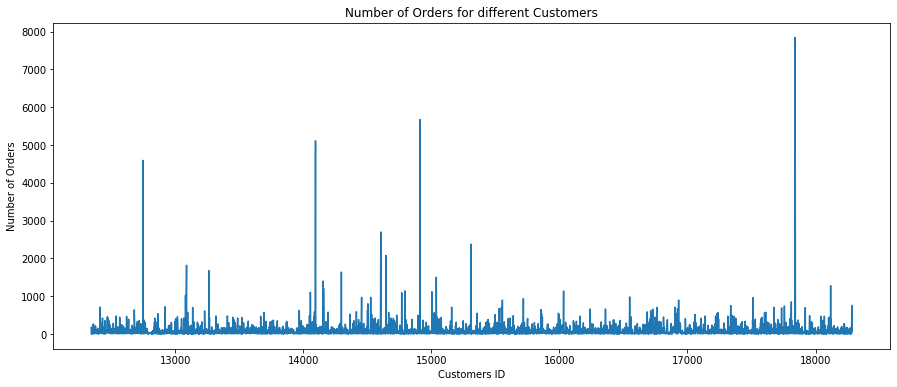

In [14]:
orders = dataset.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()
plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

In [15]:
# top 5 orders 
orders.sort_values(by='InvoiceNo', ascending=False).head()

,CustomerID,Country,InvoiceNo
4018,17841.0,United Kingdom,7847
1887,14911.0,EIRE,5675
1297,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4595
1669,14606.0,United Kingdom,2700


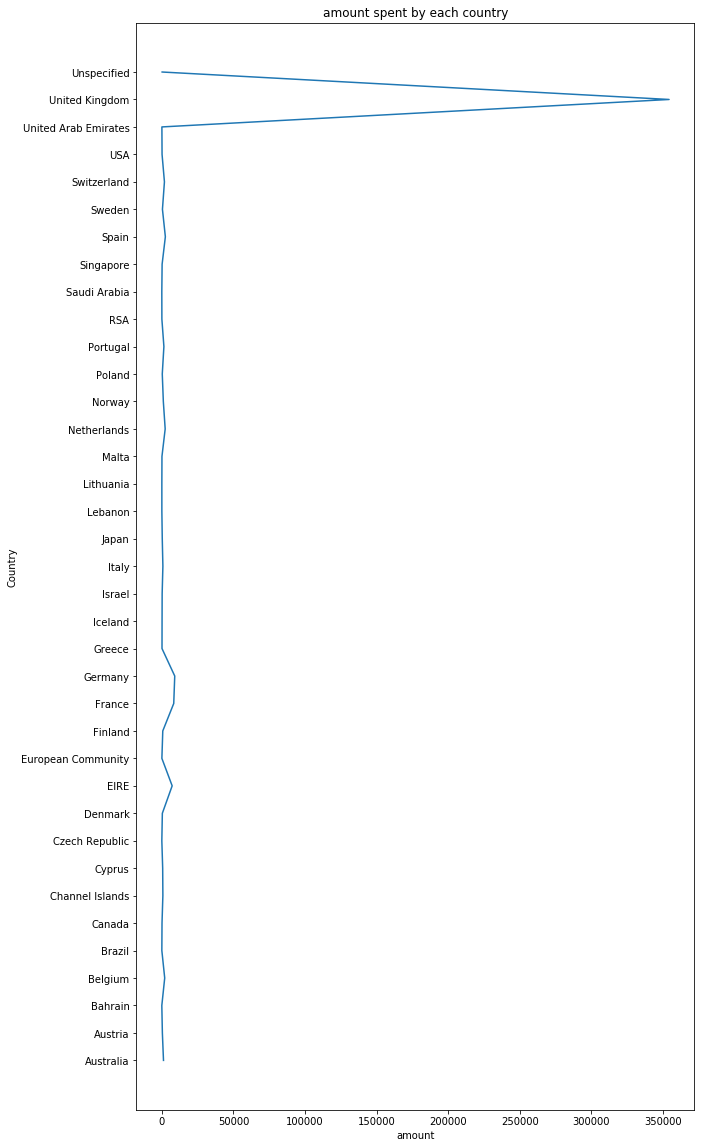

In [16]:
orders = dataset.groupby(by=['Country'], as_index=False)['amount_spent'].count()
plt.subplots(figsize=(10,20))
plt.plot(orders.amount_spent, orders.Country)
plt.xlabel('amount')
plt.ylabel('Country')
plt.title('amount spent by each country')
plt.show()

conclusion: 

- most of the transactions made were from UK 

# number of orders permonth 

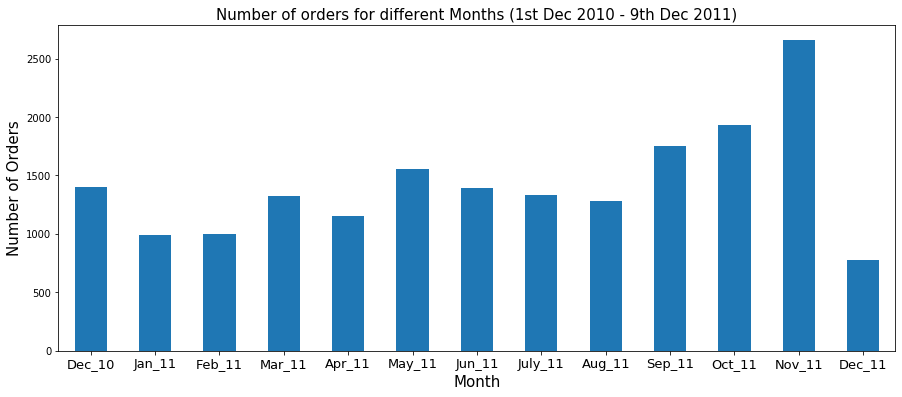

In [17]:

ax = dataset.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot('bar',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

# number of orders per day 

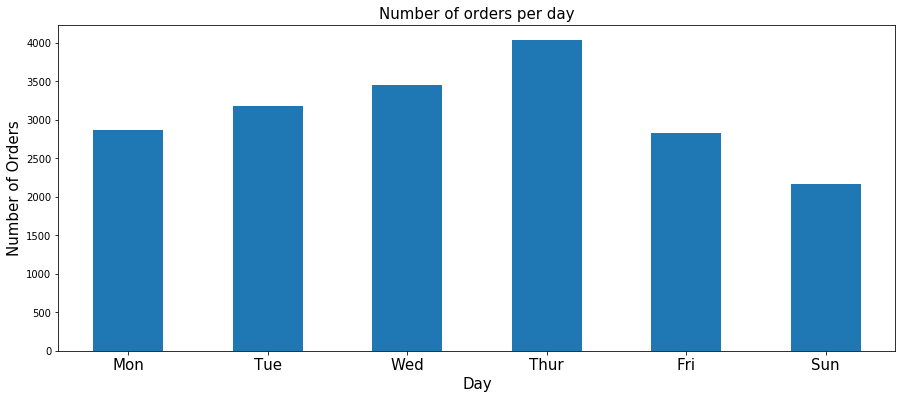

In [18]:
ax = dataset.groupby('InvoiceNo')['day'].unique().value_counts().sort_index().plot('bar',figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders per day',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

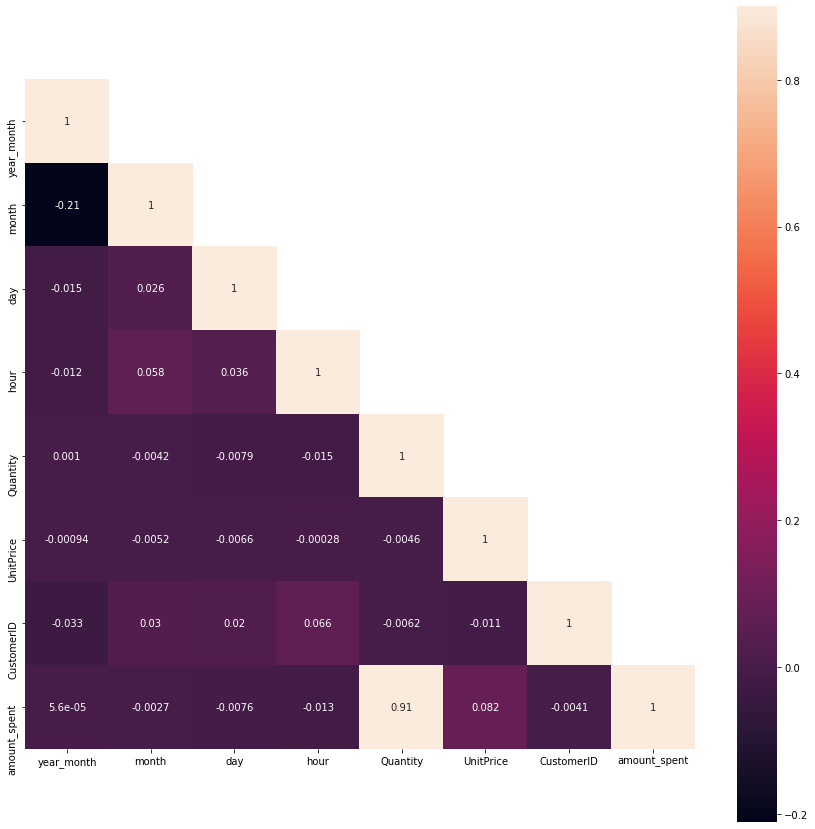

In [19]:
#create correlation
corr = dataset.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(15,15)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

- there is no correalation between the attributes 

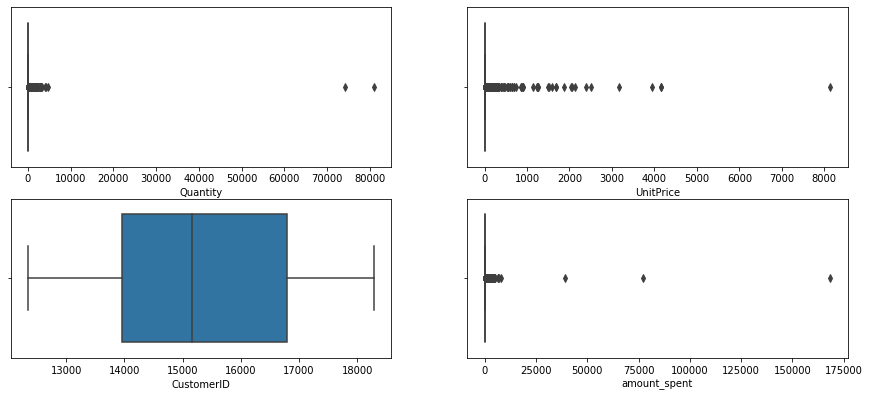

In [20]:
fig = plt.figure(figsize = (15,10))
axes = 320
for num in numerical:
    axes += 1
    fig.add_subplot(axes)
    sns.boxplot(data = dataset, x = num)
plt.show()

No handles with labels found to put in legend.


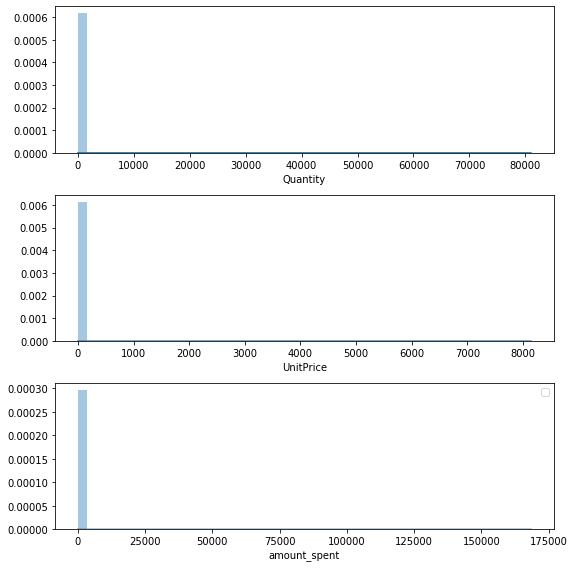

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
sns.distplot(dataset["Quantity"], ax=ax1)
sns.distplot(dataset["UnitPrice"], ax=ax2)
sns.distplot(dataset["amount_spent"], ax=ax3)
plt.tight_layout()
plt.legend()

the data is positively skewed 

## creating new columns from existing data 

In [22]:
## Finding total amount spent per customer
amount_per_cust = dataset.groupby("CustomerID").amount_spent.sum()
amount_per_cust = amount_per_cust.reset_index()
amount_per_cust.head()

,CustomerID,amount_spent
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


how frequent did each customer order? 

In [23]:
frequency = dataset.groupby("CustomerID").InvoiceNo.count()
frequency = frequency.reset_index()
frequency.head()

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


finding how recent was each order made by customers 

In [24]:
# Finding recent data ordered
recent_orders = max(dataset.InvoiceDate)
# adding 1 to avoid 0 
recent_orders = recent_orders + pd.DateOffset(days = 1)
dataset['difference'] = recent_orders - dataset.InvoiceDate
dataset.head()

,InvoiceNo,StockCode,year_month,month,day,hour,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent,difference
0,536365,85123A,201012,12,3,8,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,374 days 04:24:00
1,536365,71053,201012,12,3,8,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,374 days 04:24:00
2,536365,84406B,201012,12,3,8,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,374 days 04:24:00
3,536365,84029G,201012,12,3,8,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,374 days 04:24:00
4,536365,84029E,201012,12,3,8,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,374 days 04:24:00


In [25]:
recency = dataset.groupby('CustomerID').difference.min()
recency = recency.reset_index()
recency['difference'] = recency['difference'].dt.days
recency.head()

,CustomerID,difference
0,12346.0,326
1,12347.0,2
2,12348.0,75
3,12349.0,19
4,12350.0,310


In [26]:
# merging the 3 attributes together 
# Merge tha dataframes to get the final RFM dataframe
new = amount_per_cust.merge(frequency,on='CustomerID')
new = new.merge(recency,on='CustomerID')
new.columns = ['CustomerID', 'amount_per_cust', 'frequency', 'Recency']
new.head()

,CustomerID,amount_per_cust,frequency,Recency
0,12346.0,77183.60,1,326
1,12347.0,4310.00,182,2
2,12348.0,1797.24,31,75
3,12349.0,1757.55,73,19
4,12350.0,334.40,17,310


No handles with labels found to put in legend.


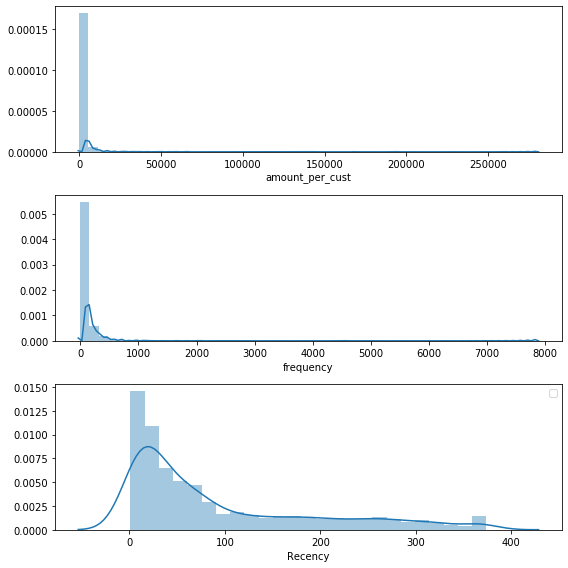

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
sns.distplot(new["amount_per_cust"], ax=ax1)
sns.distplot(new["frequency"], ax=ax2)
sns.distplot(new["Recency"], ax=ax3)
plt.tight_layout()
plt.legend()

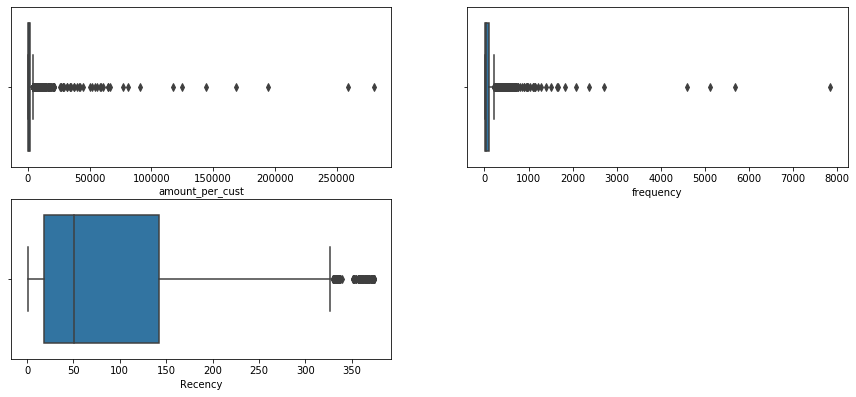

In [28]:
fig = plt.figure(figsize = (15,10))
axes = 320
numerical2 = ['amount_per_cust', 'frequency', 'Recency']
for num in numerical2:
    axes += 1
    fig.add_subplot(axes)
    sns.boxplot(data = new, x = num)
plt.show()

 the data is positively skewed 

# Feature engineering 

applying log to reduce skewness

(4338, 3)

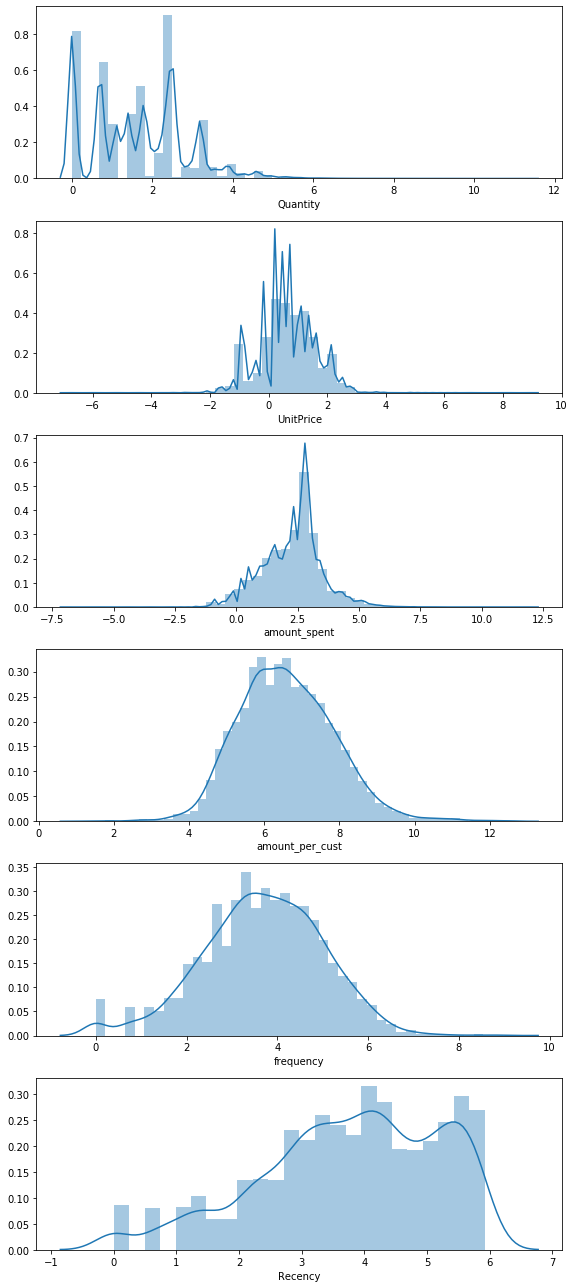

In [29]:
DS_2_cluster_log = np.log(dataset[['Quantity', 'UnitPrice','amount_spent']])
new_log = np.log(new[['amount_per_cust', 'frequency', 'Recency']])

fig, (ax1, ax2, ax3,ax4,ax5,ax6) = plt.subplots(6,1, figsize=(8,18))
sns.distplot(DS_2_cluster_log["Quantity"], ax=ax1)
sns.distplot(DS_2_cluster_log["UnitPrice"], ax=ax2)
sns.distplot(DS_2_cluster_log["amount_spent"], ax=ax3)
sns.distplot(new_log["amount_per_cust"], ax=ax4)
sns.distplot(new_log["frequency"], ax=ax5)
sns.distplot(new_log["Recency"], ax=ax6)

plt.tight_layout()
DS_2_cluster_log.shape
new_log.shape

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(new_log)

6 models 

- k-mean 


# finding the value of K using elbow method 

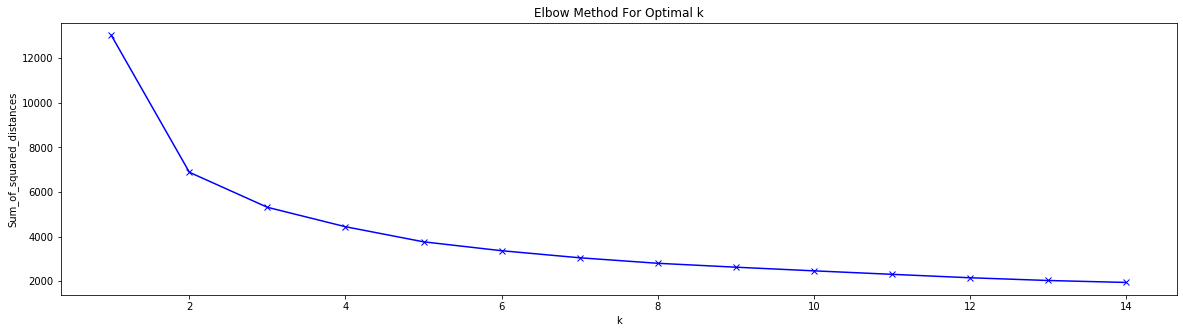

In [31]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_scaled)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(20,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### from the above graph we can see that the number of clusters is 3 thus, k = 3

K-Means


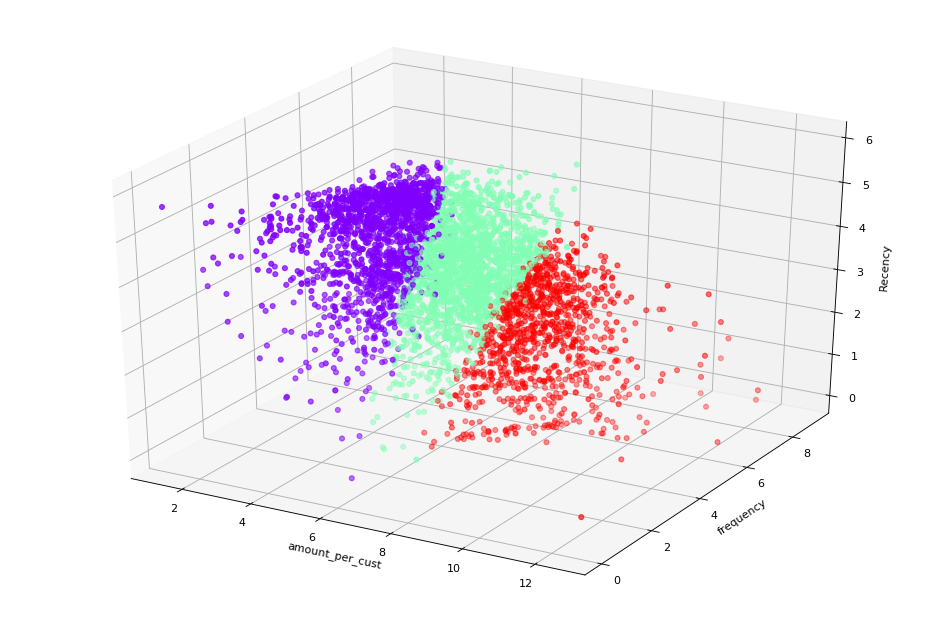

In [32]:
from mpl_toolkits.mplot3d import Axes3D

model = KMeans(n_clusters=3)
model.fit(cluster_scaled)
kmeans_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(new_log['amount_per_cust'],new_log['frequency'],new_log['Recency'],c=kmeans_labels, cmap='rainbow')

xLabel = ax.set_xlabel('amount_per_cust', linespacing=3.2)
yLabel = ax.set_ylabel('frequency', linespacing=3.1)
zLabel = ax.set_zlabel('Recency', linespacing=3.4)
print("K-Means")

In [33]:
DS2_clustered_kmeans = new.assign(Cluster=kmeans_labels)
grouped_kmeans = DS2_clustered_kmeans.groupby(['Cluster']).mean().round(1)
grouped_kmeans

,CustomerID,amount_per_cust,frequency,Recency
Cluster,,,,
0,15390.5,294.3,14.9,171.2
1,15297.0,1171.2,66.2,69.2
2,15164.4,6550.0,262.8,13.1


- cluster 0 contains all those customers that had high amount of spendings, with higher frequency and shorter timespan 

- cluster 1 contains average spending customers with average frequency of order, from time to time (longer than cluster 0 but shorter than cluster 2)

- cluster 2 contains least spending customers having least frequency of order over a very large period of timespan

## mini batch Kmean (Bonus)

C:\Users\Rama\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


K-Means mini batch


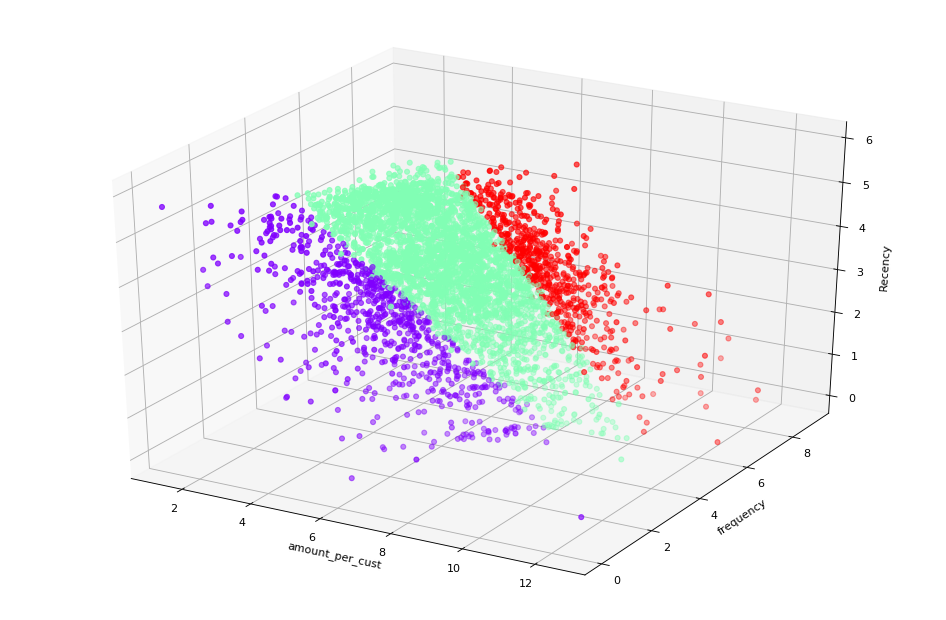

In [34]:
from sklearn.cluster import MiniBatchKMeans, KMeans 
from sklearn.metrics.pairwise import pairwise_distances_argmin 
from sklearn.datasets.samples_generator import make_blobs 
   
batch_size = 45
  
# perform the mini batch K-means 
mbk = MiniBatchKMeans(init ='k-means++', n_clusters = 3, 
                      batch_size = batch_size, verbose = 0) 
  
mbk.fit(new_log) 
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis = 0) 
mbk_means_labels = pairwise_distances_argmin(new_log, mbk_means_cluster_centers) 

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(new_log['amount_per_cust'],new_log['frequency'],new_log['Recency'],c=mbk_means_labels, cmap='rainbow')

xLabel = ax.set_xlabel('amount_per_cust', linespacing=3.2)
yLabel = ax.set_ylabel('frequency', linespacing=3.1)
zLabel = ax.set_zlabel('Recency', linespacing=3.4)
print("K-Means mini batch")

In [35]:
DS2_clustered_kmeans = new.assign(Cluster=mbk_means_labels)
grouped_kmeans = DS2_clustered_kmeans.groupby(['Cluster']).mean().round(1)
grouped_kmeans

,CustomerID,amount_per_cust,frequency,Recency
Cluster,,,,
0,15371.9,686.3,25.0,47.9
1,15333.8,1131.0,65.7,106.5
2,15052.6,8206.5,297.4,74.5


- cluster 2 contains all those customers that had high amount of spendings, with higher frequency and average timespan

- cluster 1 contains average spending customers with average frequency of order, over a very large period of timespan

- cluster 0 contains least spending customers having least frequency of order from time to time (longer than cluster 0 but shorter than cluster 1)

**conclusion :**
    - no transaction made on saturday as shown in the visualization 
    - the sales increase from monday to thursday then decrease. 
    - most transactions are made from UK 
    - sales increase in november 2011 and decrease by december 2011
    - drived the amount spent in each transaction, amount per customer , the frequency of each customer ordering
        and how recent did they order 
    - the invoice data was further broken down to hour, min, second, day, month , and year
    - 3 clusters were formed from k mean. 
    - the data was positively skewed 
    - there was no correalation between the features 